# Regresión Lineal

#### Regresión lineal en el conjunto de datos de diabetes

Exploremos los conjuntos de datos que se incluyen en esta biblioteca de Python. Estos conjuntos de datos se han limpiado y formateado para su uso en algoritmos de aprendizaje automático.

Primero, cargaremos el conjunto de datos de diabetes. Haga esto en la celda a continuación importando los conjuntos de datos y luego cargándolos en la variable `diabetes` usando la función `load_diabetes()` [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
diabetes=load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Exploremos esta variable observando los diferentes atributos (claves) de `diabetes`. Tenga en cuenta que la función `load_diabetes` no devuelve *DataFrames*. Le devuelve un diccionario de Python.

In [3]:
x=diabetes.data
y=diabetes.target

df=pd.DataFrame(data=x, columns=diabetes.feature_names)
df['Target']=y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#### El siguiente paso es leer la descripción del conjunto de datos.

Imprima la descripción en la siguiente celda usando el atributo `DESCR` de la variable `diabetes`. Lea atentamente la descripción de los datos para comprender completamente lo que representa cada columna.

*Sugerencia: si su salida tiene un formato incorrecto y muestra saltos de línea como `\n`, significa que no está utilizando la función `print`.*

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
len(df.columns)

11

#### Basándonos en la descripción de los datos, responda las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué quieren decir?

1. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`?

1. ¿Cuántos registros hay en los datos?

<font color='orange'>Respuestas</font>

* 10 columnas de atributos. una del target.
* diabetes[datos] son atributos mientras el diabetes[objetivo] es el target.
* 442 registros. Desde el 0 hasta 441.

#### Ahora explore lo que contiene la clave *data* así como la clave *target* de "diabetes".

Scikit-learn normalmente toma matrices numéricas como entrada (aunque también se aceptan *DataFrames* de `Pandas`). Inspeccione la forma de *data* y de *target*. Confirme que sean consistentes con la descripción de los datos.

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
#sns.pairplot(df);

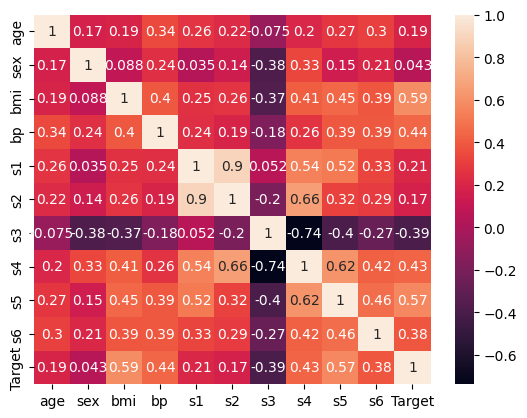

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

Alta correlacion entre las siguientes variables:
- s1 y s2. Eliminaremos s2 para nuestro modelo.
- s2 y s4. Queda eliminada s2.
- s3 y s4. Eliminamos s4.
- s4 y s5. Queda eliminada s4.

Variables eliminadas para el analisis: s2 y s4.

## Constryendo un modelo de regresión

Los datos ya se han dividido en variables predictoras / variables explicativas (*data*) y de respuesta (*target*). Dada esta información, aplicaremos lo que hemos aprendido anteriormente sobre la regresión lineal y aplicaremos el algoritmo al conjunto de datos de diabetes.

#### En la celda siguiente, importe la clase `linear_model` desde `sklearn`.

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Cree una nueva instancia del modelo de regresión lineal y asigne la nueva instancia a la variable `diabetes_model`.

In [12]:
diabetes_model=LinearRegression()

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'Target'],
      dtype='object')

In [31]:
x=df[['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']] #columnas con variables dependientes
y=df['Target'] #target

In [32]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#### A continuación, dividamos los datos de entrenamiento y prueba.

Defina `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test` y `diabetes_target_test`. Utilice los últimos 20 registros para los datos de *test* y el resto para los datos de *train*.

In [33]:
#1 MANERA
diabetes_data_train,diabetes_data_test,diabetes_target_train,diabetes_target_test=train_test_split(x,y,test_size=20,shuffle=False)

In [16]:
#2 MANERA

#Los primeros registros hasta los ultimos 20 como entrenamiento.
diabetes_data_train=x[:-20]
diabetes_target_train=y[:-20]

#Ultimos 20 registros como TEST
diabetes_data_test=x[-20:]
diabetes_target_test=y[-20:]

Explora tu *dataset* antes del entrenamiento del modelo

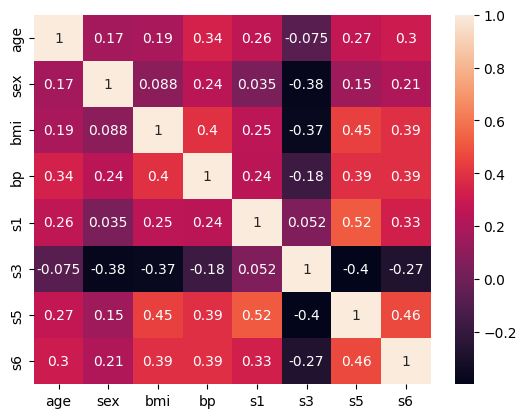

In [17]:
sns.heatmap(x.corr(numeric_only=True), annot=True);

Ajuste los datos y la variable objetivode entrenamiento a `diabetes_model`. Muestra los valores de *intercept* y *coefficients* del modelo.

In [22]:
diabetes_model.fit(diabetes_data_train,diabetes_target_train)

LinearRegression()

Variable independiente de la ecuación de la regresión lineal:

In [23]:
diabetes_model.intercept_

152.7312801513606

coeficientes de la ecuación de la regresión lineal:

In [24]:
diabetes_model.coef_

array([   3.05803963, -229.76116828,  519.41634951,  320.77513872,
       -145.78399931, -246.5467941 ,  524.19925469,   82.88957662])

In [34]:
coef=pd.DataFrame(diabetes_model.coef_,
                  diabetes_data_train.columns,
                  columns=['Coeficientes'])
coef

,Coeficientes
age,3.058040
sex,-229.761168
bmi,519.416350
bp,320.775139
s1,-145.783999
s3,-246.546794
s5,524.199255
s6,82.889577


#### Inspeccionando los resultados

De las salidas deberías haber visto:

- El valor de intersección es un número flotante.
- Los coeficientes son una matriz que contiene 10 números flotantes.

Este es el modelo de regresión lineal ajustado a su conjunto de datos de entrenamiento.

#### Utilizando su modelo de regresión lineal ajustado, ejecuta las predicciones de `diabetes_data_test`.

y = a + bx1 + cx2...

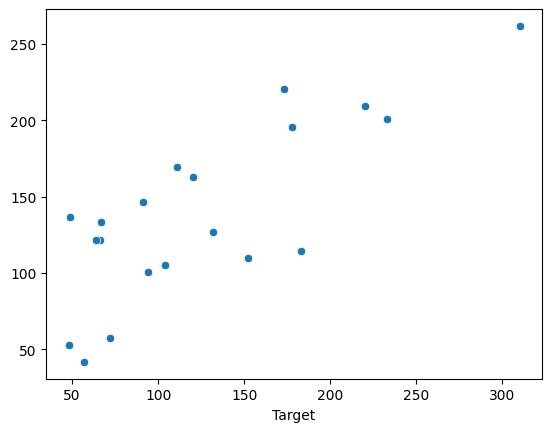

In [35]:
predictions=diabetes_model.predict(diabetes_data_test)
sns.scatterplot(x=diabetes_target_test, y=predictions);

In [37]:
df_eval=pd.DataFrame({'predicciones':predictions,'Valor real':diabetes_target_test})
df_eval

,predicciones,Valor real
422,200.840163,233.0
423,146.429506,91.0
424,169.213341,111.0
425,109.682271,152.0
426,162.697601,120.0
427,133.225998,67.0
428,261.773712,310.0
429,100.916698,94.0
430,114.474837,183.0
431,121.371502,66.0


y = 152.76 + 0.3*x1 - 237 * x2...

#### Imprime tu `diabetes_target_test` y compáralo con la predicción. 

In [28]:
diabetes_target_test

422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, dtype: float64

In [29]:
predictions

array([200.84016282, 146.42950646, 169.21334136, 109.68227143,
       162.69760139, 133.22599762, 261.77371197, 100.91669795,
       114.47483676, 121.37150215, 220.23093702,  57.48010315,
       136.95024599, 121.34735332,  52.96699142, 195.43987874,
       105.17891407, 126.81402963, 209.41165187,  41.78009176])

#### ¿Es `diabetes_target_test` exactamente igual a la predicción del modelo?

Los residuos deben ,ostrar una distribución normal.

<Axes: xlabel='Target', ylabel='Count'>

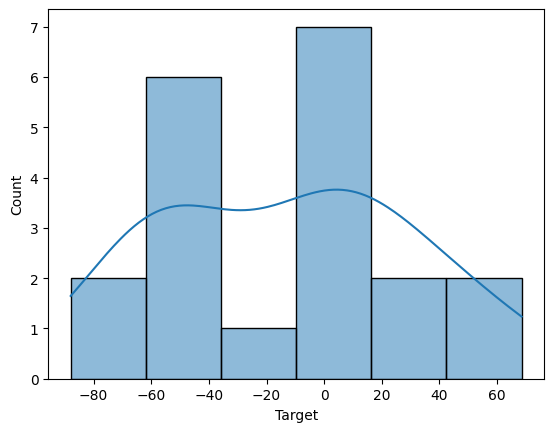

In [40]:
sns.histplot((diabetes_target_test-predictions), kde=True)

In [39]:
diabetes_model.score(diabetes_data_test,diabetes_target_test)

0.588122003192402

In [38]:
print('MAE:', metrics.mean_absolute_error(diabetes_target_test, predictions)) #media de los errores en valor absoluto
print('MAPE:', metrics.mean_absolute_percentage_error(diabetes_target_test, predictions))  #te da de 0 a 1 el porcentaje del error
print('MSE:', metrics.mean_squared_error(diabetes_target_test, predictions)) #No se suele utilizar. Calcula los errores al cuadrado.
print('RMSE:', np.sqrt(metrics.mean_squared_error(diabetes_target_test, predictions))) #El que nos aporta la mayor prespectiva. Es la raiz cuadrada del MSE

MAE: 36.885605404947455
MAPE: 0.4034837581125686
MSE: 1989.848503056995
RMSE: 44.60771797634345


## Extra: Interpreta tu modelo ¿Cuáles son las variables más importantes?

## Iteramos con un nuevo modelo ¿Podemos mejorar el anterior?

Estandarizare las variables y repetire el proceso.

In [48]:
#IMPORTAMOS LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#CARGAMOS DATASET Y CREAMOS EL DATAFRAME
diabetes=load_diabetes()

x=diabetes.data
y=diabetes.target

df=pd.DataFrame(data=x, columns=diabetes.feature_names)
df['Target']=y
df.head()

#SELECCIONAMOS VARIABLES PARA EL ANALISIS
x=df[['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']] #columnas con variables dependientes
y=df['Target'] #target

#DE MANERA ALEATORIA ELEGIMOS CONJUNTO DE ENTRENAMIENTO Y DE TEST.
diabetes_data_train,diabetes_data_test,diabetes_target_train,diabetes_target_test=train_test_split(x,y,test_size=20,random_state=52)

#ESTANDARIZAMOS DATOS DE ENTRENAMIENTO
std_scale=preprocessing.StandardScaler().fit(diabetes_data_train)
diabetes_data_train=std_scale.transform(diabetes_data_train)

#ENTRENAMIENTO
diabetes_model=LinearRegression()
diabetes_model.fit(diabetes_data_train,diabetes_target_train)

#ESTANDARIZAMOS DATOS DE TEST
std_scale=preprocessing.StandardScaler().fit(diabetes_data_test)
diabetes_data_test=std_scale.transform(diabetes_data_test)

#TEST
predictions=diabetes_model.predict(diabetes_data_test)


Analizamos el resultado:

In [43]:
diabetes_model.score(diabetes_data_test,diabetes_target_test)

0.08039238451702002

<Axes: xlabel='Target'>

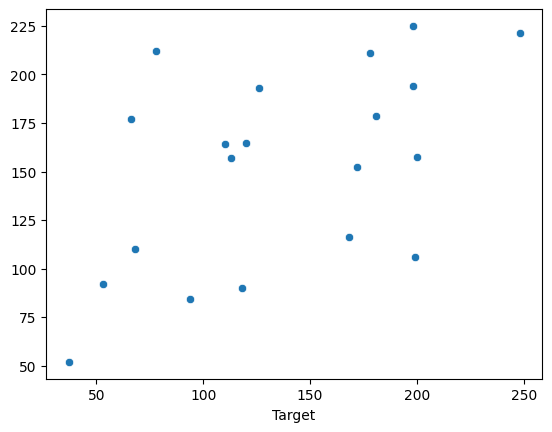

In [44]:
sns.scatterplot(x=diabetes_target_test, y=predictions)

In [45]:
print('MAE:', metrics.mean_absolute_error(diabetes_target_test, predictions)) #media de los errores en valor absoluto
print('MAPE:', metrics.mean_absolute_percentage_error(diabetes_target_test, predictions))  #te da de 0 a 1 el porcentaje del error
print('MSE:', metrics.mean_squared_error(diabetes_target_test, predictions)) #No se suele utilizar. Calcula los errores al cuadrado.
print('RMSE:', np.sqrt(metrics.mean_squared_error(diabetes_target_test, predictions))) #El que nos aporta la mayor prespectiva. Es la raiz cuadrada del MSE

MAE: 44.46508532320075
MAPE: 0.4426204515720972
MSE: 3109.733617422052
RMSE: 55.76498558613686


Seleccion variables mas limitada.

In [57]:
#IMPORTAMOS LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#CARGAMOS DATASET Y CREAMOS EL DATAFRAME
diabetes=load_diabetes()

x=diabetes.data
y=diabetes.target

df=pd.DataFrame(data=x, columns=diabetes.feature_names)
df['Target']=y
df.head()

#SELECCIONAMOS VARIABLES PARA EL ANALISIS
x=df[['bmi', 'bp', 's5','s1']] #columnas con variables dependientes
y=df['Target'] #target

#DE MANERA ALEATORIA ELEGIMOS CONJUNTO DE ENTRENAMIENTO Y DE TEST.
diabetes_data_train,diabetes_data_test,diabetes_target_train,diabetes_target_test=train_test_split(x,y,test_size=20,random_state=52)

#ESTANDARIZAMOS DATOS DE ENTRENAMIENTO
std_scale=preprocessing.StandardScaler().fit(diabetes_data_train)
diabetes_data_train=std_scale.transform(diabetes_data_train)

#ENTRENAMIENTO
diabetes_model=LinearRegression()
diabetes_model.fit(diabetes_data_train,diabetes_target_train)

#ESTANDARIZAMOS DATOS DE TEST
std_scale=preprocessing.StandardScaler().fit(diabetes_data_test)
diabetes_data_test=std_scale.transform(diabetes_data_test)

#TEST
predictions=diabetes_model.predict(diabetes_data_test)


In [58]:
print('MAE:', metrics.mean_absolute_error(diabetes_target_test, predictions)) #media de los errores en valor absoluto
print('MAPE:', metrics.mean_absolute_percentage_error(diabetes_target_test, predictions))  #te da de 0 a 1 el porcentaje del error
print('MSE:', metrics.mean_squared_error(diabetes_target_test, predictions)) #No se suele utilizar. Calcula los errores al cuadrado.
print('RMSE:', np.sqrt(metrics.mean_squared_error(diabetes_target_test, predictions))) #El que nos aporta la mayor prespectiva. Es la raiz cuadrada del MSE

MAE: 45.13027275041657
MAPE: 0.4569657577607778
MSE: 3101.954603679106
RMSE: 55.69519372153316


<Axes: xlabel='Target'>

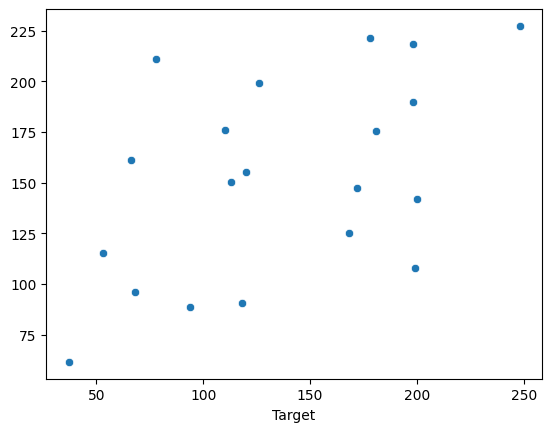

In [59]:
sns.scatterplot(x=diabetes_target_test, y=predictions)